In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
from src.test import Tester

In [3]:
import numpy as np
from PIL import Image

In [4]:
from src.datasets import ALOVDataset

In [5]:
from torchvision import transforms

In [6]:
from src.helper import FromTensor, ToTensor, Normalize, show_batch

In [7]:
%matplotlib inline

In [8]:
model_weights ='../checkpoints/model_n_epoch_10_loss_1.551.pth'
save_directory = ''
data_directory ='../ALOV/Frames/13-ZoomingCamera/13-ZoomingCamera_video00028/'

In [9]:
transform = transforms.Compose([Normalize(), ToTensor()])
alov = ALOVDataset('../ALOV/Frames/',
                            '../ALOV/GT/',
                            transform)

In [10]:
from_tensor = FromTensor()

In [11]:
ix = from_tensor(alov[0])

In [12]:
alov.x[0]

array([ '../ALOV/Frames/13-ZoomingCamera/13-ZoomingCamera_video00028/00000001.jpg',
       '../ALOV/Frames/13-ZoomingCamera/13-ZoomingCamera_video00028/00000006.jpg'],
      dtype='<U72')

In [45]:
ix['currbb']

array([ 2.22666669,  1.85536718,  7.24888897,  6.86779642], dtype=float32)

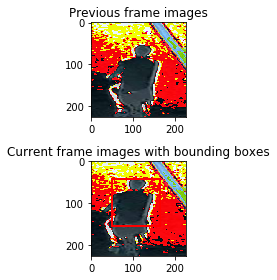

In [46]:
show_batch(alov[0])

In [13]:
img = Image.open('../ALOV/Frames/13-ZoomingCamera/13-ZoomingCamera_video00028/00000001.jpg')

In [14]:
ann = alov.y[0][0]
ann = ann.strip().split(' ')
left = min(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
top = min(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
right = max(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
bottom = max(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
init_box = [left, top, right, bottom]

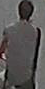

In [15]:
img.crop(init_box)

In [35]:
tester = Tester(data_directory, model_weights, np.array(init_box).astype(float), save_directory)

In [21]:
len(tester.x)

247

In [80]:
alov.len

49

In [41]:
tester.prev_rect = tester.init_bbox
tester.anim_idx = 0

In [52]:
tester.model.eval()

GoNet(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d (64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d (192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d (384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential(
    (0): Linear(in_features=18432, out_features=4096)
    (1): ReLU(inplace)
    (2): Dropout(p=0.5)
    (3): Linear(in_features=4096, out_features=4096)
    (4): ReLU(inplace)
    (5): Dropout(p=0.5)
    (6): Linear

In [46]:
tester.model.train()

GoNet(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d (64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d (192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d (384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential(
    (0): Linear(in_features=18432, out_features=4096)
    (1): ReLU(inplace)
    (2): Dropout(p=0.5)
    (3): Linear(in_features=4096, out_features=4096)
    (4): ReLU(inplace)
    (5): Dropout(p=0.5)
    (6): Linear

In [55]:
tester.model.classifier[5].training

False

In [27]:
np.all(tester[0]['previmg'] == alov[0]['previmg'])

True

In [28]:
 0.8877  0.6028  2.7055  2.4302

SyntaxError: invalid syntax (<ipython-input-28-904da01bfd84>, line 1)

Testing frame # 0


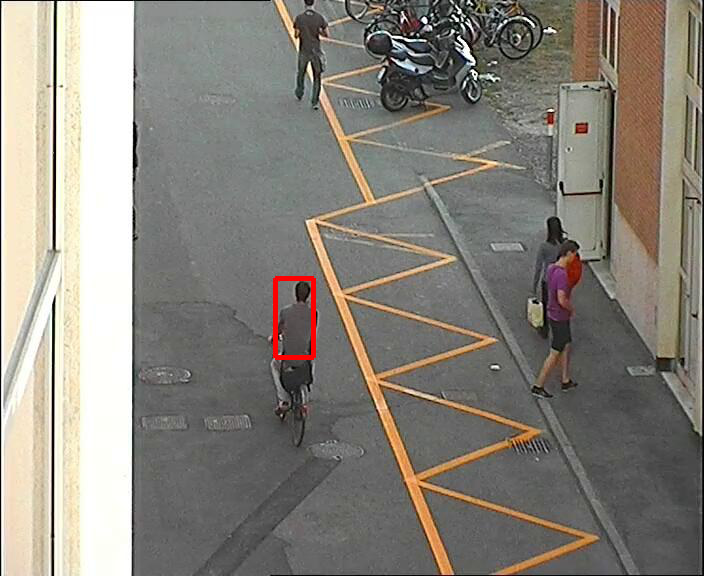

In [37]:
tester.test(animated=False)

In [42]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

In [43]:
display_animation(tester.animated_test())

Testing frame # 1
Testing frame # 2
Testing frame # 3
Testing frame # 4
Testing frame # 5
Testing frame # 6
Testing frame # 7
Testing frame # 8
Testing frame # 9
Testing frame # 10
Testing frame # 11


In [ ]:
import 